## RCSJ model of Josephson Junction
### Chaotic Dynamics in Josephson Junction Syamal Kumar Dana, Member, IEEE, Dipendra Chandra Sengupta, and Kossi D. Edoh

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
import pysindy as ps

In [2]:
# Seed the random number generators for reproducibility
np.random.seed(10)

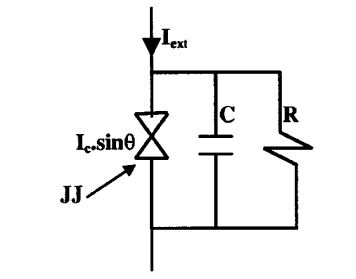

### Define constants:

In [3]:
e = 1.60217662E-19  # Electron charge (C)
h = 6.62607004E-34  # Plancks constant (m^2*kg/s)
pi = 3.141592653589793

### Define parameters:

In [4]:
R = 0.5E6  # Linear resistor (junction resistance)
C = 1E-16  # Linear capacitor (junction capacitance)
Ic = 1E-10  # Threshold current associated with the tunneling current

I0 = 1  # DC componant of current source
I1 = 1  # AC amplitude of current source
omega = 10000  # Input current frequency (rad/s) 

# Dimensionless variables:
A0 = 1
A1 = 1
beta = 1
Omega = 3

### Define input current source (control input) as:
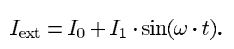

In [5]:
def i_ext(t):
    return A0+A1*np.sin(omega*t) 

### Define Circuit equations using Kirchoff's laws:

In [6]:
# We will let x[0] = theta, x[1] = theta'
def josjunc(x,t):
    u = i_ext(t)
    return [
        x[1],
        u - beta*x[1] - ((Omega)**2*np.sin(x[0]))
    ]

### Define training time array

In [7]:
dt = 0.00001
t_train = np.arange(0,5,dt)  # Time range to integrate over
x0_train = [0,0]

In [8]:
x_train = odeint(josjunc, x0_train, t_train)  # Integrate to produce
u_train = i_ext(t_train)

In [9]:
combined_library = ps.FourierLibrary() + ps.IdentityLibrary()
stlsq_optimizer = ps.STLSQ(threshold=0.15)

model = ps.SINDy(feature_library=combined_library,
                optimizer=stlsq_optimizer)
model.fit(x_train, u=u_train, t=dt)
model.print()

x0' = 1.000 x1
x1' = -6.663 sin(1 x0) + 0.034 sin(1 x1) + -2.317 x0 + -1.033 x1 + 0.998 u0


### Assess results based on test trajectory


In [10]:
t_test = np.arange(0, 0.02, dt)
x0_test = np.array([1,1])
x_test = odeint(josjunc, x0_test, t_test)
u_test = i_ext(t_test)
print('Model score: %f' % model.score(x_test, u=u_test, t=dt))

Model score: 0.866403
